In [40]:
library(tidyverse)
library(bigrquery)
library(plotly)

In [41]:
# define the project
project <- "perfect-purpose-251405"

# write the query to get data
get_data_query <- paste0("SELECT EXTRACT(HOUR FROM TIMESTAMP_SECONDS(visitStartTime)) AS hour,
sum(totals.visits ) sessions
FROM `google.com:analytics-bigquery.LondonCycleHelmet.ga_sessions_20130910`
group by 1")

# download data from BigQuery 
df_hour_of_day <- bq_table_download(bq_project_query(project,
                                            get_data_query,
                                            use_legacy_sql = FALSE))

In [46]:
# check the dataframe of results

df_hour_of_day %>% arrange(hour) 

hour,sessions
8,7
9,34
10,6
11,5
13,11


In [43]:
# generate a 24 hour table of sessions

visits_per_hour_1 <- data.frame(hour=seq(0, 7), sessions=c(0))
visits_per_hour_2 <- data.frame(hour=seq(14, 23), sessions=c(0))
hour_table <- union_all(visits_per_hour_1, visits_per_hour_2)
hour_table <- union_all(df_hour_of_day, hour_table) 
hour_table %>% arrange(desc(hour)) 

hour,sessions
23,0
22,0
21,0
20,0
19,0
18,0
17,0
16,0
15,0
14,0


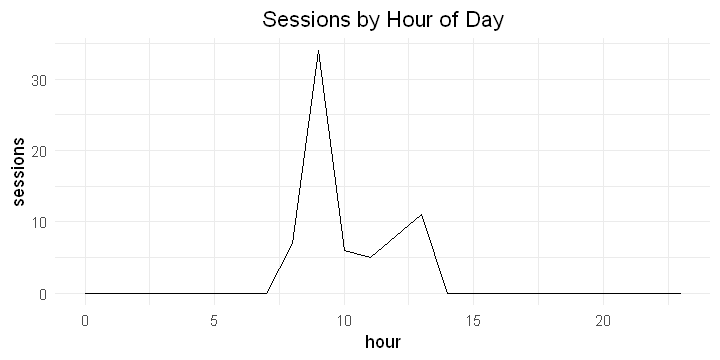

In [47]:
# plot visits per hour of the day

saved <- options(repr.plot.width=6, repr.plot.height=3)

hourly_plot <- ggplot(data=hour_table, aes(x=hour, y=sessions)) +
  geom_line() +
  theme_minimal() +
  ggtitle("Sessions by Hour of Day") +
  theme(plot.title = element_text(hjust = 0.5))

hourly_plot
options(saved)